# Results

In [1]:
import json
import math
import re
import numpy as np
import pandas as pd
from pathlib import Path
from collections import defaultdict
from display import display_evolution_match_ids
from metrics import score, recall, ndcg, mrr

In [2]:
def clean_string(string):
    if not string:
        return ""
    return re.sub(r'\W+','', string).lower() 

def load_preds(paths):
    preds = []
    for path in paths:
        preds_annot = {}
        for annotator_i in [1,2,3]:
            file_path = Path(f'{path}/preds_annot{annotator_i}.json')
            preds_annot[f"A{annotator_i}"] = { id_:[clean_string(ref["id"]) for ref in references] for id_, references in json.loads(file_path.read_text()).items()}
        preds.append(preds_annot)
    return json.loads(json.dumps(preds))

# Amount of undetermined ids per year

In [3]:
def mean_year(preds, year):    
    return np.mean([(len([v for v in vs if v])/len(vs) if len(vs) else 1) for k, vs in preds.items() if str(year) in k])

def mean_match_ids(keys, preds):
    scores = defaultdict(lambda: defaultdict(dict))
    for year in [2020, 2021, 2022, 2023, 2024]:
            for i, key in enumerate(keys):
                    scores[year][key] = np.mean([mean_year(preds[i][f"A{annotator_i}"], year) for annotator_i in [1,2,3]])
    return json.loads(json.dumps(scores))

In [9]:
mean_match = mean_match_ids(["S2", "GS", "GPT-4o","GPT-4o Json", "GPT-4o SO", "Gemini"], load_preds(["current_methods/search_engines/preds/semantic_scholar", 
                "current_methods/search_engines/preds/google_scholar",
                "current_methods/instructs_models/preds/gpt-4o",
                "current_methods/instructs_models/preds/gpt-4o_json",
                "current_methods/instructs_models/preds/gpt-4o-2024-08-06_structured_output",
                "current_methods/instructs_models/preds/gemini-1.5-flash"]))
mean_match

{'2020': {'S2': 1.0,
  'GS': 0.9340958605664488,
  'GPT-4o': 0.6612512864838024,
  'GPT-4o Json': 0.44313725490196076,
  'GPT-4o SO': 0.31764705882352945,
  'Gemini': 0.5959703902200716},
 '2021': {'S2': 1.0,
  'GS': 0.9745614035087719,
  'GPT-4o': 0.607515800197485,
  'GPT-4o Json': 0.39210526315789473,
  'GPT-4o SO': 0.3315789473684211,
  'Gemini': 0.6788868808666756},
 '2022': {'S2': 1.0,
  'GS': 0.9543859649122807,
  'GPT-4o': 0.6280781182076604,
  'GPT-4o Json': 0.4745614035087719,
  'GPT-4o SO': 0.3622807017543859,
  'Gemini': 0.647104603614299},
 '2023': {'S2': 1.0,
  'GS': 0.9307692307692307,
  'GPT-4o': 0.5353996183092397,
  'GPT-4o Json': 0.22564102564102564,
  'GPT-4o SO': 0.14615384615384616,
  'Gemini': 0.6072997178260336},
 '2024': {'S2': 1.0,
  'GS': 0.9033333333333333,
  'GPT-4o': 0.3015534950467871,
  'GPT-4o Json': 0.14333333333333334,
  'GPT-4o SO': 0.06777777777777778,
  'Gemini': 0.6249685791791055}}

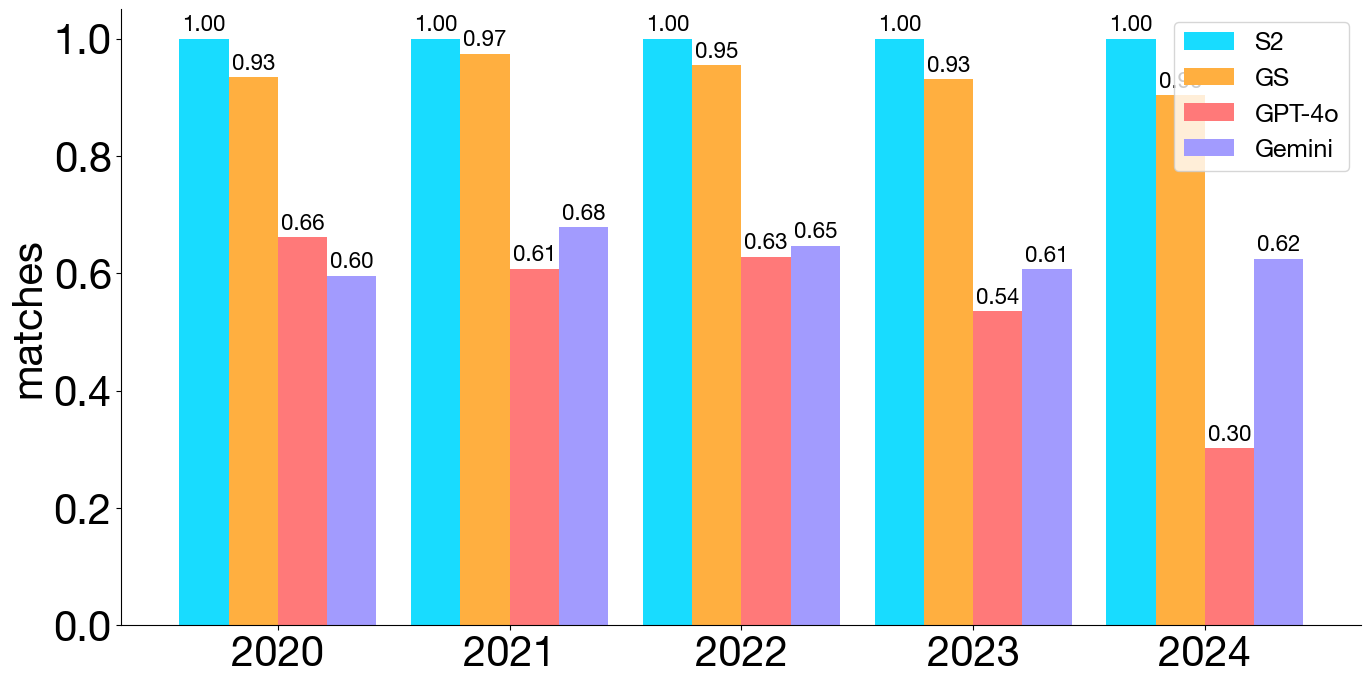

In [10]:
display_evolution_match_ids(mean_match, ["S2", "GS", "GPT-4o", "Gemini"])

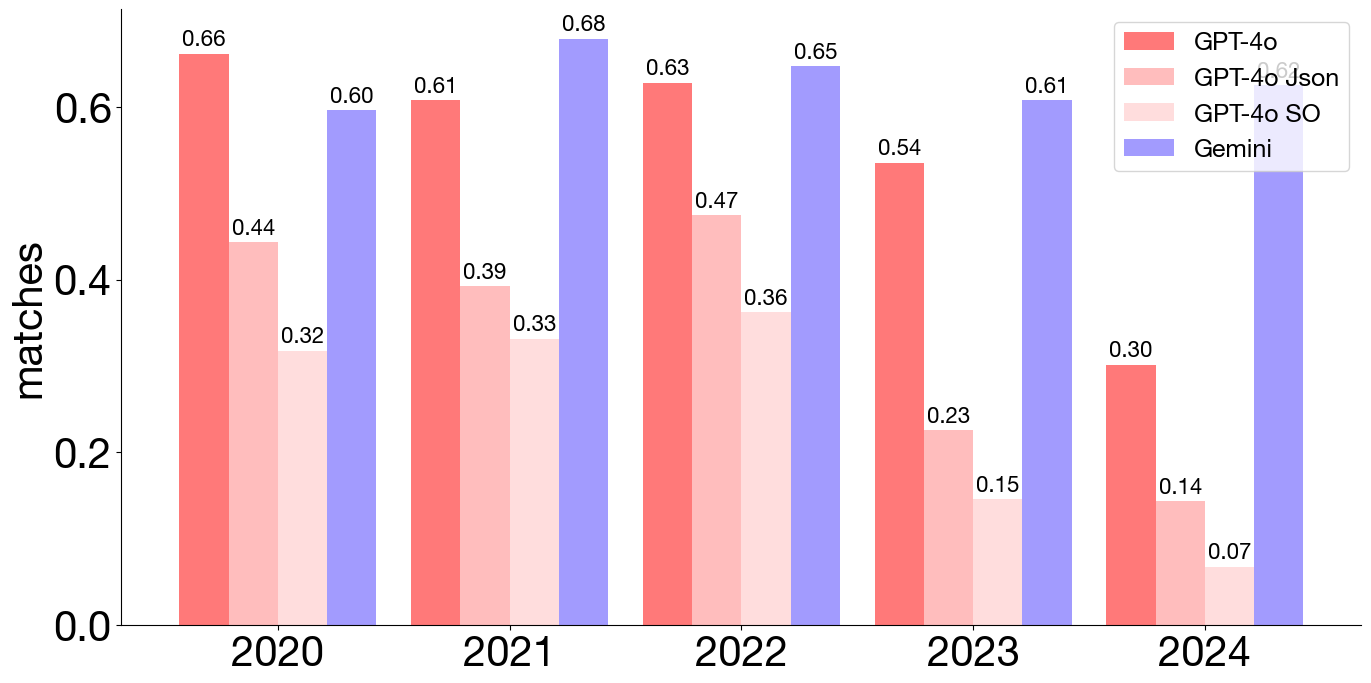

In [11]:
display_evolution_match_ids(mean_match, ["GPT-4o", "GPT-4o Json", "GPT-4o SO", "Gemini"], colormap=['#ff7979', '#FFBDBD', '#FFDDDD', "#a29bfe"])